# Introduction
The next step after doing the EDA is to use the cleaned data for model building. The data will be used to train the model and this trained model can be used to predict the motor speed. Since this is a continuous variable problem the **regression** techniques will be used here. 

Regression suggests that the model will train itself with the independent variables and make a regression equation or model. Then this model will predict the motor speed. This predicted value will then be compared with the actual motor speed value to get some error and performance measures. These measures will tell us how good the model is performing.

There are different types of regression techniques:
1. Multi-linear regression
2. Decision tree regression
3. KNN regression
4. Random forest regression
5. Bagging ensemble technique
6. AdaBoost technique
7. Gradient boosting technique
8. Stacking models technique
9. Cross validation technique with above models
10. Artificial Neural Networks

The first three techniques are the basic techniques. The next five techniques are the ensemble techniques that would contain a number of these basic models stacked together and each model will run based on the output on the previous model. These are simply grouping techniques. All of these ensemble techniques make a group of same basic model except for the stacking model in which we can stack together different basic models.

The cross validation techniques will make different folds of the data and run the training multiple times. Each time a different set of observations is used for training and testing based on the number of folds. This will allow to reduce any errors caused by improper splitting of data. But when the dataset size is very large like this one the cross validation will not show much difference from the regular techniques.

The final one is the neural networks in which the data is fed into the network and the network will be trained with these inputs. The training involves the changing of weights applied on the connections between neurons in one layer to another layer based on the error between the prediction and actual value that is back propagated in the network.

We can also tune the hyperparameters in all these models in order to get the best possible results.

In the model training here, I used the VIF dataset that contains the **u_d**, **u_q**, **i_d**, and **pm** as independent variables and the **motor_speed** as the target variable.

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('temperature_data_vif.csv', index_col=0)
data

,u_d,u_q,i_d,pm,motor_speed
0,0.327935,-1.297858,1.029572,-2.522071,-1.222428
1,0.329665,-1.297686,1.029509,-2.522418,-1.222429
2,0.332771,-1.301822,1.029448,-2.522673,-1.222428
3,0.333700,-1.301852,1.032845,-2.521639,-1.222430
4,0.335206,-1.303118,1.031807,-2.521900,-1.222429
...,...,...,...,...,...
998065,0.331475,-1.246114,1.029142,0.429853,-1.222428
998066,0.331701,-1.250655,1.029148,0.429751,-1.222437
998067,0.330946,-1.246852,1.029191,0.429439,-1.222430
998068,0.330987,-1.249505,1.029147,0.429558,-1.222432


## Multi-linear regression
This is like making a mathematical equation that contains the target variable on one side equated to the independent variables on the other side. The model will be trained by changing the coefficients of the independent variables.

### Model 1 - Linear Model

In [3]:
model_lin = smf.ols('motor_speed~u_d+u_q+i_d+pm', data = data).fit()

In [4]:
model_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_speed   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 3.286e+06
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:17:58   Log-Likelihood:                -53333.
No. Observations:              848914   AIC:                         1.067e+05
Df Residuals:                  848909   BIC:                         1.067e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0940      0.000    326.099      0.000       0.093       0.095
u_d            0.0817      0.000    226.806      0.000       0.081       0.082
u_q            0.5262      0.000   1872.588      0.000       0.526       0.527
i_d           -0.7333      0.000  -2023.252      0.000      -0.734      -0.733
pm             0.0537      0.000    172.093      0.000       0.053       0.054
==============================================================================
Omnibus:                    49383.508   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           198133.857
Skew:                          -0.137   Prob(JB):                         0.00
Kurtosis:                       5.351   Cond. No.                         2.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
## Accuracies
lin_acc = np.round(model_lin.rsquared,3)

## Errors
lin_err = np.round(model_lin.mse_resid,4)

print('Linear model accuracy', lin_acc)
print('-----------------------------------------------------------------')
print('Linear model error', lin_err)

Linear model accuracy 0.939
-----------------------------------------------------------------
Linear model error 0.0664


The r2 score or the accuracy of this model, which is 0.939 is quite decent.

### Model 2 - Quadratic model
A new column with the squared value of the i_d column will be added and used in the equation.

In [6]:
data['i_d_squared'] = data['i_d'] * data['i_d']
data['u_q_squared'] = data['u_q'] * data['u_q']
data

,u_d,u_q,i_d,pm,motor_speed,i_d_squared,u_q_squared
0,0.327935,-1.297858,1.029572,-2.522071,-1.222428,1.060019,1.684434
1,0.329665,-1.297686,1.029509,-2.522418,-1.222429,1.059889,1.683990
2,0.332771,-1.301822,1.029448,-2.522673,-1.222428,1.059763,1.694740
3,0.333700,-1.301852,1.032845,-2.521639,-1.222430,1.066769,1.694819
4,0.335206,-1.303118,1.031807,-2.521900,-1.222429,1.064626,1.698117
...,...,...,...,...,...,...,...
998065,0.331475,-1.246114,1.029142,0.429853,-1.222428,1.059133,1.552800
998066,0.331701,-1.250655,1.029148,0.429751,-1.222437,1.059146,1.564137
998067,0.330946,-1.246852,1.029191,0.429439,-1.222430,1.059233,1.554640
998068,0.330987,-1.249505,1.029147,0.429558,-1.222432,1.059143,1.561262


In [7]:
model_quad = smf.ols('motor_speed~u_d+u_q+i_d+i_d_squared+u_q_squared+pm', data = data).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_speed   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 2.406e+06
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:17:59   Log-Likelihood:                -15759.
No. Observations:              848914   AIC:                         3.153e+04
Df Residuals:                  848907   BIC:                         3.161e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0479      0.001    -79.669      0.000      -0.049      -0.047
u_d             0.0755      0.000    214.701      0.000       0.075       0.076
u_q             0.5421      0.000   1391.521      0.000       0.541       0.543
i_d            -0.7112      0.000  -1480.604      0.000      -0.712      -0.710
i_d_squared     0.0570      0.000    133.985      0.000       0.056       0.058
u_q_squared     0.0748      0.000    215.918      0.000       0.074       0.075
pm              0.0499      0.000    166.404      0.000       0.049       0.050
==============================================================================
Omnibus:                   114092.770   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           938179.225
Skew:                          -0.388   Prob(JB):                         0.00
Kurtosis:                       8.091   Cond. No.                         5.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
## Accuracies
quad_acc = np.round(model_quad.rsquared,3)

## Errors
quad_err = np.round(model_quad.mse_resid,4)

print('Quadratic model accuracy', quad_acc)
print('-----------------------------------------------------------------')
print('Quadratic model error', quad_err)

Quadratic model accuracy 0.944
-----------------------------------------------------------------
Quadratic model error 0.0608


There is some improvement in the r2 score from the previous model. 0.933 to 0.944

### Model 3 - Cubic model
Increasing the order of the polynomial to 3. Two new columns with the cubes of the i_d and u_q columns will be added and the model will be built.

In [9]:
data['i_d_cube'] = data['i_d'] * data['i_d'] * data['i_d']
data['u_q_cube'] = data['u_q'] * data['u_q'] * data['u_q']
data

,u_d,u_q,i_d,pm,motor_speed,i_d_squared,u_q_squared,i_d_cube,u_q_cube
0,0.327935,-1.297858,1.029572,-2.522071,-1.222428,1.060019,1.684434,1.091367,-2.186155
1,0.329665,-1.297686,1.029509,-2.522418,-1.222429,1.059889,1.683990,1.091165,-2.185291
2,0.332771,-1.301822,1.029448,-2.522673,-1.222428,1.059763,1.694740,1.090970,-2.206249
3,0.333700,-1.301852,1.032845,-2.521639,-1.222430,1.066769,1.694819,1.101806,-2.206403
4,0.335206,-1.303118,1.031807,-2.521900,-1.222429,1.064626,1.698117,1.098489,-2.212846
...,...,...,...,...,...,...,...,...,...
998065,0.331475,-1.246114,1.029142,0.429853,-1.222428,1.059133,1.552800,1.089999,-1.934966
998066,0.331701,-1.250655,1.029148,0.429751,-1.222437,1.059146,1.564137,1.090018,-1.956196
998067,0.330946,-1.246852,1.029191,0.429439,-1.222430,1.059233,1.554640,1.090153,-1.938405
998068,0.330987,-1.249505,1.029147,0.429558,-1.222432,1.059143,1.561262,1.090014,-1.950805


In [10]:
model_cube = smf.ols('motor_speed~u_d+u_q+u_q_squared+i_d+i_d_squared+i_d_cube+u_q_cube+pm', data = data).fit()
model_cube.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_speed   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 3.002e+06
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:18:00   Log-Likelihood:             1.9071e+05
No. Observations:              848914   AIC:                        -3.814e+05
Df Residuals:                  848905   BIC:                        -3.813e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2722      0.001   -474.181      0.000      -0.273      -0.271
u_d             0.0494      0.000    177.618      0.000       0.049       0.050
u_q             0.6136      0.001    943.172      0.000       0.612       0.615
u_q_squared     0.0875      0.000    267.889      0.000       0.087       0.088
i_d            -0.9322      0.000  -1920.704      0.000      -0.933      -0.931
i_d_squared     0.3830      0.001    681.834      0.000       0.382       0.384
i_d_cube        0.1975      0.000    710.586      0.000       0.197       0.198
u_q_cube       -0.0137      0.000    -40.149      0.000      -0.014      -0.013
pm              0.0484      0.000    205.804      0.000       0.048       0.049
==============================================================================
Omnibus:                   109403.459   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1216434.530
Skew:                          -0.188   Prob(JB):                         0.00
Kurtosis:                       8.852   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
## Accuracies
cube_acc = np.round(model_cube.rsquared,3)

## Errors
cube_err = np.round(model_cube.mse_resid,4)

print('Cubic model accuracy', cube_acc)
print('-----------------------------------------------------------------')
print('Cubic model error', cube_err)

Cubic model accuracy 0.966
-----------------------------------------------------------------
Cubic model error 0.0374


The cubic model gave a much better accuracy of 0.966

--------

The next set of models would be the exponential or logarithmic models, and then the square root and cube root models. To use these models we need to check if there are any negative values in the columns. As a negative value's logarithm and roots will give a NaN.

### Checking the columns for negative values

In [12]:
(data['motor_speed']<0).value_counts()

True     436698
False    412216
Name: motor_speed, dtype: int64

In [13]:
(data['u_q']<0).value_counts()

False    437442
True     411472
Name: u_q, dtype: int64

In [14]:
(data['i_d']<0).value_counts()

False    508740
True     340174
Name: i_d, dtype: int64

**From the above results it is clear that there are a lot of negative values in the three important columns. So these models cannot be used with the original dataset. The solution for this is to convert all the columns to a scale more than 0. This can be achieved using the Normalization process with MinMaxScaler**

In [15]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data_norm = mm.fit_transform(data)
data_norm = pd.DataFrame(data_norm)
data_norm.columns = list(data)
data_norm

,u_d,u_q,i_d,pm,motor_speed,i_d_squared,u_q_squared,i_d_cube,u_q_cube
0,0.504799,0.113323,0.992642,0.019217,0.043909,0.109597,0.523663,0.996786,0.251008
1,0.505240,0.113372,0.992627,0.019155,0.043909,0.109583,0.523525,0.996779,0.251089
2,0.506031,0.112186,0.992613,0.019109,0.043909,0.109570,0.526867,0.996773,0.249116
3,0.506267,0.112177,0.993427,0.019295,0.043908,0.110294,0.526892,0.997120,0.249101
4,0.506651,0.111814,0.993178,0.019248,0.043909,0.110073,0.527917,0.997014,0.248495
...,...,...,...,...,...,...,...,...,...
848909,0.505701,0.128164,0.992539,0.551489,0.043909,0.109505,0.482740,0.996742,0.274658
848910,0.505758,0.126862,0.992541,0.551470,0.043906,0.109506,0.486265,0.996743,0.272659
848911,0.505566,0.127953,0.992551,0.551414,0.043908,0.109515,0.483312,0.996747,0.274334
848912,0.505576,0.127192,0.992540,0.551435,0.043908,0.109506,0.485371,0.996743,0.273166


### Checking if any columns have negative values

In [16]:
print((data_norm['motor_speed']<0).value_counts())
print((data_norm['u_q']<0).value_counts())
print((data_norm['i_d']<0).value_counts())
print((data_norm['u_d']<0).value_counts())
print((data_norm['pm']<0).value_counts())

False    848914
Name: motor_speed, dtype: int64
False    848914
Name: u_q, dtype: int64
False    848914
Name: i_d, dtype: int64
False    848914
Name: u_d, dtype: int64
False    848914
Name: pm, dtype: int64


None of the columns have any negative values

### Model 4 - Square root model

In [17]:
## Adding the square root columns of the i_d and u_q columns
data_norm['i_d_sqrt'] = np.sqrt(data_norm['i_d'])
data_norm['u_q_sqrt'] = np.sqrt(data_norm['u_q'])
data_norm

,u_d,u_q,i_d,pm,motor_speed,i_d_squared,u_q_squared,i_d_cube,u_q_cube,i_d_sqrt,u_q_sqrt
0,0.504799,0.113323,0.992642,0.019217,0.043909,0.109597,0.523663,0.996786,0.251008,0.996314,0.336635
1,0.505240,0.113372,0.992627,0.019155,0.043909,0.109583,0.523525,0.996779,0.251089,0.996307,0.336708
2,0.506031,0.112186,0.992613,0.019109,0.043909,0.109570,0.526867,0.996773,0.249116,0.996299,0.334942
3,0.506267,0.112177,0.993427,0.019295,0.043908,0.110294,0.526892,0.997120,0.249101,0.996708,0.334929
4,0.506651,0.111814,0.993178,0.019248,0.043909,0.110073,0.527917,0.997014,0.248495,0.996583,0.334386
...,...,...,...,...,...,...,...,...,...,...,...
848909,0.505701,0.128164,0.992539,0.551489,0.043909,0.109505,0.482740,0.996742,0.274658,0.996263,0.358001
848910,0.505758,0.126862,0.992541,0.551470,0.043906,0.109506,0.486265,0.996743,0.272659,0.996263,0.356177
848911,0.505566,0.127953,0.992551,0.551414,0.043908,0.109515,0.483312,0.996747,0.274334,0.996268,0.357705
848912,0.505576,0.127192,0.992540,0.551435,0.043908,0.109506,0.485371,0.996743,0.273166,0.996263,0.356640


In [18]:
model_sqrt = smf.ols('motor_speed~u_d+u_q+i_d+i_d_sqrt+u_q_sqrt+pm', data = data_norm).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_speed   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 2.385e+06
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:18:01   Log-Likelihood:             1.0184e+06
No. Observations:              848914   AIC:                        -2.037e+06
Df Residuals:                  848907   BIC:                        -2.037e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8838      0.002    388.118      0.000       0.879       0.888
u_d            0.0758      0.000    185.510      0.000       0.075       0.077
u_q            1.1022      0.002    513.283      0.000       1.098       1.106
i_d           -1.1796      0.004   -286.690      0.000      -1.188      -1.172
i_d_sqrt       0.3823      0.006     60.371      0.000       0.370       0.395
u_q_sqrt      -0.7601      0.003   -265.809      0.000      -0.766      -0.755
pm             0.0759      0.000    154.205      0.000       0.075       0.077
==============================================================================
Omnibus:                    67602.964   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           412856.636
Skew:                          -0.033   Prob(JB):                         0.00
Kurtosis:                       6.416   Cond. No.                         185.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
## Accuracies
sqrt_acc = np.round(model_sqrt.rsquared,3)

## Errors
sqrt_err = np.round(model_sqrt.mse_resid,4)

print('Square root model accuracy', sqrt_acc)
print('-----------------------------------------------------------------')
print('Square root model error', sqrt_err)

Square root model accuracy 0.944
-----------------------------------------------------------------
Square root model error 0.0053


This gave the same accuracy as the quadratic model.

### Model 5 - Cube root model

In [20]:
data_norm['i_d_cbrt'] = np.cbrt(data_norm['i_d'])
data_norm['u_q_cbrt'] = np.cbrt(data_norm['u_q'])
data_norm

,u_d,u_q,i_d,pm,motor_speed,i_d_squared,u_q_squared,i_d_cube,u_q_cube,i_d_sqrt,u_q_sqrt,i_d_cbrt,u_q_cbrt
0,0.504799,0.113323,0.992642,0.019217,0.043909,0.109597,0.523663,0.996786,0.251008,0.996314,0.336635,0.997541,0.483919
1,0.505240,0.113372,0.992627,0.019155,0.043909,0.109583,0.523525,0.996779,0.251089,0.996307,0.336708,0.997536,0.483989
2,0.506031,0.112186,0.992613,0.019109,0.043909,0.109570,0.526867,0.996773,0.249116,0.996299,0.334942,0.997531,0.482295
3,0.506267,0.112177,0.993427,0.019295,0.043908,0.110294,0.526892,0.997120,0.249101,0.996708,0.334929,0.997804,0.482283
4,0.506651,0.111814,0.993178,0.019248,0.043909,0.110073,0.527917,0.997014,0.248495,0.996583,0.334386,0.997721,0.481762
...,...,...,...,...,...,...,...,...,...,...,...,...,...
848909,0.505701,0.128164,0.992539,0.551489,0.043909,0.109505,0.482740,0.996742,0.274658,0.996263,0.358001,0.997507,0.504184
848910,0.505758,0.126862,0.992541,0.551470,0.043906,0.109506,0.486265,0.996743,0.272659,0.996263,0.356177,0.997507,0.502470
848911,0.505566,0.127953,0.992551,0.551414,0.043908,0.109515,0.483312,0.996747,0.274334,0.996268,0.357705,0.997511,0.503906
848912,0.505576,0.127192,0.992540,0.551435,0.043908,0.109506,0.485371,0.996743,0.273166,0.996263,0.356640,0.997507,0.502906


In [21]:
model_cbrt = smf.ols('motor_speed~u_d+u_q+i_d+i_d_sqrt+u_q_sqrt+i_d_cbrt+u_q_cbrt+pm', data = data_norm).fit()
model_cbrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            motor_speed   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 2.247e+06
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:18:02   Log-Likelihood:             1.1103e+06
No. Observations:              848914   AIC:                        -2.221e+06
Df Residuals:                  848905   BIC:                        -2.221e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1445      0.010   -204.896      0.000      -2.165      -2.124
u_d            0.0827      0.000    225.067      0.000       0.082       0.083
u_q           -2.8809      0.016   -185.541      0.000      -2.911      -2.850
i_d            6.3965      0.017    372.612      0.000       6.363       6.430
i_d_sqrt     -39.5714      0.089   -446.077      0.000     -39.745     -39.398
u_q_sqrt      20.0743      0.079    255.651      0.000      19.920      20.228
i_d_cbrt      38.4997      0.085    451.052      0.000      38.332      38.667
u_q_cbrt     -19.9195      0.075   -266.964      0.000     -20.066     -19.773
pm             0.0714      0.000    161.486      0.000       0.070       0.072
==============================================================================
Omnibus:                   214971.079   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5582211.073
Skew:                           0.641   Prob(JB):                         0.00
Kurtosis:                      15.497   Cond. No.                     4.70e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
## Accuracies
cbrt_acc = np.round(model_cbrt.rsquared,3)

## Errors
cbrt_err = np.round(model_cbrt.mse_resid,4)

print('Cube root model accuracy', cbrt_acc)
print('-----------------------------------------------------------------')
print('Cube root model error', cbrt_err)

Cube root model accuracy 0.955
-----------------------------------------------------------------
Cube root model error 0.0043


The accuracy is a little better than the square root model

**So, in the linear regression technique the model with the cubic elements has the highest accuracy of 0.966.**

## Decision Tree Model
This model works on the construction of trees that contains different branches at different splits. And these branches contains leaves or nodes which are the end points. A split occurs at a node based on a certain condition which the model will make based on the data.

This model is normally used for classification purposes. But it can also be used for regression.

### Model training on the whole dataset

In [23]:
from sklearn.tree import DecisionTreeRegressor
dct = DecisionTreeRegressor()
x = data[['u_d', 'u_q', 'i_d', 'pm']]
y = data['motor_speed']
dct.fit(x, y)

DecisionTreeRegressor()

In [24]:
y_pred = dct.predict(x)
from sklearn.metrics import mean_squared_error, r2_score
dct_acc = r2_score(y, y_pred)
dct_err = mean_squared_error(y, y_pred)
print('Decision tree accuracy is', r2_score(y, y_pred))
print('----------------------------------------------------------------')
print('Decision tree error is', mean_squared_error(y, y_pred))

Decision tree accuracy is 0.9999999999998568
----------------------------------------------------------------
Decision tree error is 1.56765408878068e-13


In [25]:
from sklearn import tree
text_representation = tree.export_text(dct)
print(text_representation)

|--- feature_2 <= 0.04
|   |--- feature_2 <= -0.29
|   |   |--- feature_1 <= 0.61
|   |   |   |--- feature_2 <= -1.00
|   |   |   |   |--- feature_2 <= -2.17
|   |   |   |   |   |--- feature_2 <= -2.49
|   |   |   |   |   |   |--- feature_1 <= -1.28
|   |   |   |   |   |   |   |--- feature_2 <= -2.65
|   |   |   |   |   |   |   |   |--- feature_0 <= -1.65
|   |   |   |   |   |   |   |   |   |--- feature_1 <= -1.30
|   |   |   |   |   |   |   |   |   |   |--- value: [0.23]
|   |   |   |   |   |   |   |   |   |--- feature_1 >  -1.30
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.40
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.22]
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  0.40
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.22]
|   |   |   |   |   |   |   |   |--- feature_0 >  -1.65
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.38
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= -0.06
|   |   |   |   |   |   |   |   

In [26]:
dct.get_depth()

101

0.9999 is a very good accuracy and it is giving the least error of 1.6915382369589332e-13. The result is much better when compared to the linear regression.

### Splitting the data into train and test

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)
dct1 = DecisionTreeRegressor(max_depth=30)
dct1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=30)

In [28]:
y_pred_train = dct1.predict(x_train)
y_pred_test = dct1.predict(x_test)

dct_train_acc = r2_score(y_train, y_pred_train)
dct_test_acc = r2_score(y_test, y_pred_test)

dct_train_err = mean_squared_error(y_train, y_pred_train)
dct_test_err = mean_squared_error(y_test, y_pred_test)
print('Decision tree train accuracy is', dct_train_acc)
print('Decision tree test accuracy is', dct_test_acc)
print('----------------------------------------------------------------')
print('Decision tree train error is', dct_train_err)
print('Decision tree test error is', dct_test_err)

Decision tree train accuracy is 0.9999749607363208
Decision tree test accuracy is 0.9978945349079834
----------------------------------------------------------------
Decision tree train error is 2.7389696966948417e-05
Decision tree test error is 0.0023053096353912107


In [29]:
text_representation = tree.export_text(dct1)
print(text_representation)

|--- feature_2 <= 0.04
|   |--- feature_2 <= -0.29
|   |   |--- feature_1 <= 1.01
|   |   |   |--- feature_2 <= -0.73
|   |   |   |   |--- feature_2 <= -2.17
|   |   |   |   |   |--- feature_2 <= -2.49
|   |   |   |   |   |   |--- feature_1 <= -1.28
|   |   |   |   |   |   |   |--- feature_2 <= -2.65
|   |   |   |   |   |   |   |   |--- feature_0 <= -1.65
|   |   |   |   |   |   |   |   |   |--- feature_2 <= -2.70
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.25
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.23]
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  0.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_2 >  -2.70
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= -2.68
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.33]
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  -2.68
|   |   |   |   |   |   |   |   |   |   |   |--- value: [0.28]
| 

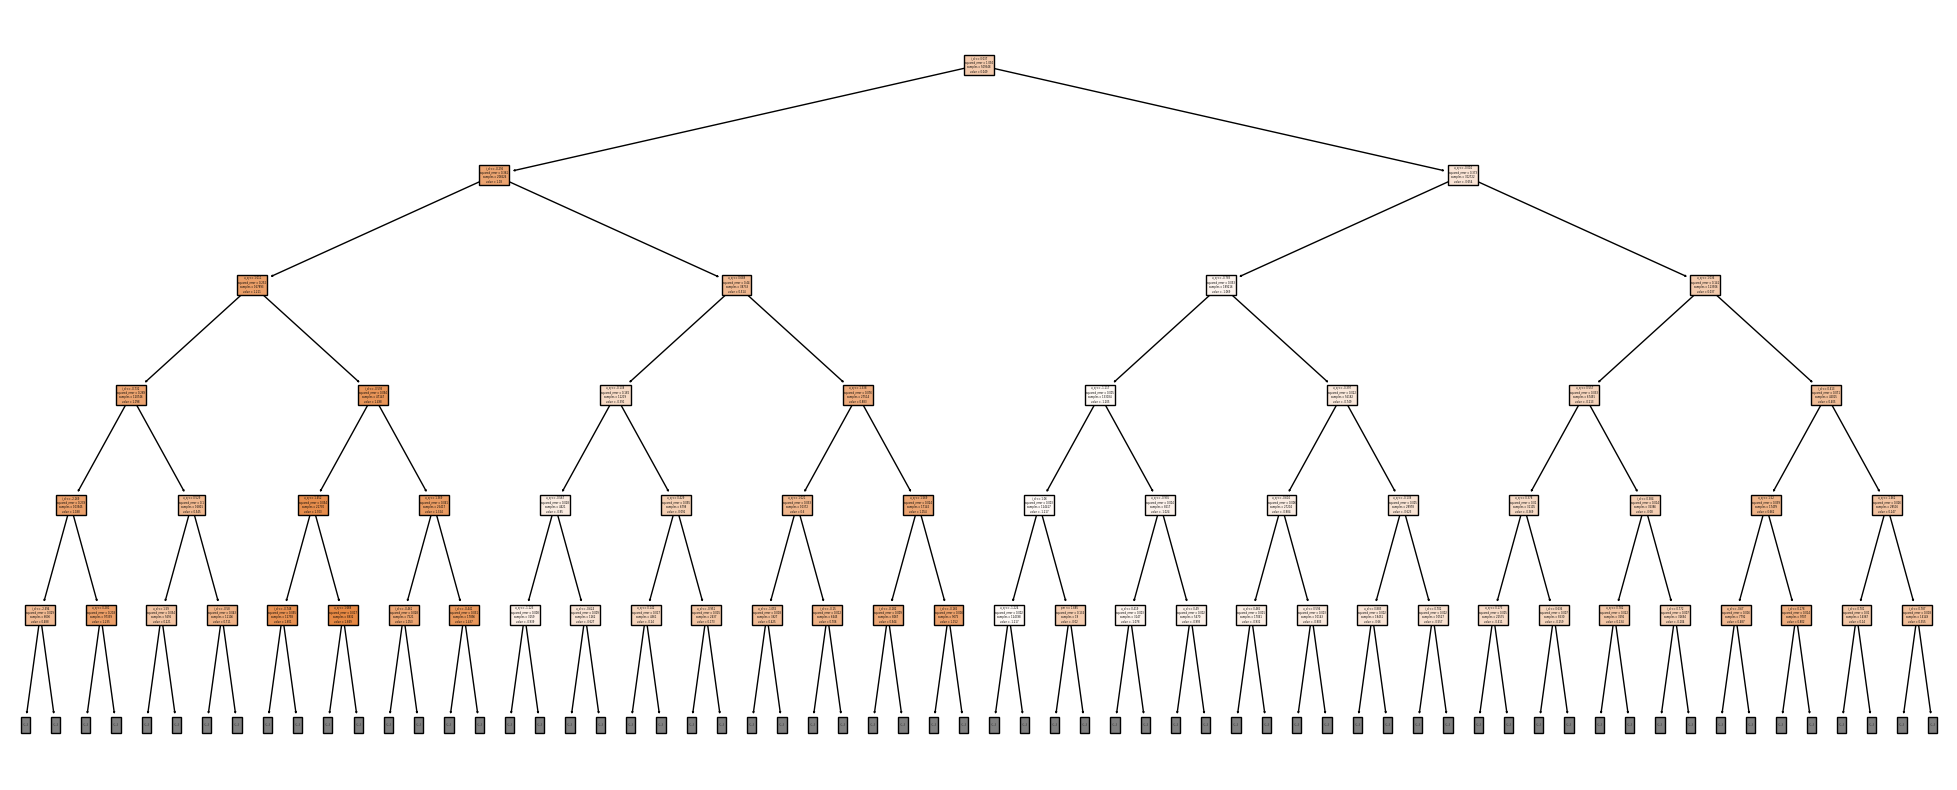

In [30]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(dct1, feature_names= ['u_d', 'u_q', 'i_d', 'pm'],filled=True, max_depth=5)

The accuracy of the model on the test set is a almost equal to the accuracy in the previous case. 

### Training using a different criterion
The error criterion is changed and the model is again trained on the training set.

In [31]:
dct2 = DecisionTreeRegressor(criterion='friedman_mse', max_depth=30)
dct2.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=30)

In [32]:
y_pred_train = dct2.predict(x_train)
y_pred_test = dct2.predict(x_test)

dct_train_acc1 = r2_score(y_train, y_pred_train)
dct_test_acc1 = r2_score(y_test, y_pred_test)

dct_train_err1 = mean_squared_error(y_train, y_pred_train)
dct_test_err1 = mean_squared_error(y_test, y_pred_test)
print('Decision tree train accuracy is', dct_train_acc1)
print('Decision tree test accuracy is', dct_test_acc1)
print('----------------------------------------------------------------')
print('Decision tree train error is', dct_train_err1)
print('Decision tree test error is', dct_test_err1)

Decision tree train accuracy is 0.999974960736207
Decision tree test accuracy is 0.9978803273548512
----------------------------------------------------------------
Decision tree train error is 2.738969709147346e-05
Decision tree test error is 0.0023208657276081795


The error and accuracy measures are same as in the previous case.

## KNN Regressor
The K-Nearest Neighbors technique is generally used in the classification problems. It classifies the data into different groups based on the nearest neighbors of a data point. In the regression problem the target is predicted by local interpolation of the targets associated of the nearest neighbors in the training set.

In [33]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [34]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

knn_train_acc = r2_score(y_train, y_pred_train)
knn_test_acc = r2_score(y_test, y_pred_test)

knn_train_err = mean_squared_error(y_train, y_pred_train)
knn_test_err = mean_squared_error(y_test, y_pred_test)
print('KNN train accuracy is', knn_train_acc)
print('KNN test accuracy is', knn_test_acc)
print('----------------------------------------------------------------')
print('KNN train error is', knn_train_err)
print('KNN  test error is', knn_test_err)

KNN train accuracy is 0.9990032438536847
KNN test accuracy is 0.9984831609546874
----------------------------------------------------------------
KNN train error is 0.001090321550475711
KNN  test error is 0.001660812938554844


This KNN technique gave some very high test accuracy of 0.99 and much less error.

## Random Forest
This is an ensemble technique that uses a lot of decision trees arranged in series. The default amount is 100 estimators. And then it will get the aggregated result of all the trees.

### Using Grid Search for selecting the hyperparameters

In [37]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
n_estimators = [10, 30, 50]
max_depth = [20, 30]
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth)
rnd_x = RandomForestRegressor()
grid = GridSearchCV(estimator = rnd_x,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START max_depth=20, n_estimators=10...............................
[CV 1/5; 1/6] END max_depth=20, n_estimators=10;, score=0.998 total time=  41.7s
[CV 2/5; 1/6] START max_depth=20, n_estimators=10...............................
[CV 2/5; 1/6] END max_depth=20, n_estimators=10;, score=0.998 total time=  41.6s
[CV 3/5; 1/6] START max_depth=20, n_estimators=10...............................
[CV 3/5; 1/6] END max_depth=20, n_estimators=10;, score=0.998 total time=  42.2s
[CV 4/5; 1/6] START max_depth=20, n_estimators=10...............................
[CV 4/5; 1/6] END max_depth=20, n_estimators=10;, score=0.998 total time=  40.9s
[CV 5/5; 1/6] START max_depth=20, n_estimators=10...............................
[CV 5/5; 1/6] END max_depth=20, n_estimators=10;, score=0.999 total time=  40.8s
[CV 1/5; 2/6] START max_depth=20, n_estimators=30...............................
[CV 1/5; 2/6] END max_depth=20, n_estimators=30;,

### With 10 estimators

In [38]:
from sklearn.ensemble import RandomForestRegressor
rnd_10 = RandomForestRegressor(n_estimators=10, max_depth=30)
rnd_10.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=10)

In [39]:
y_pred_train = rnd_10.predict(x_train)
y_pred_test = rnd_10.predict(x_test)

rnd10_train_acc = r2_score(y_train, y_pred_train)
rnd10_test_acc = r2_score(y_test, y_pred_test)

rnd10_train_err = mean_squared_error(y_train, y_pred_train)
rnd10_test_err = mean_squared_error(y_test, y_pred_test)
print('Random Forest 10 estimator train accuracy is', rnd10_train_acc)
print('Random Forest 10 estimator test accuracy is', rnd10_test_acc)
print('----------------------------------------------------------------')
print('Random Forest 10 estimator train error is', rnd10_train_err)
print('Random Forest 10 estimator test error is', rnd10_test_err)

Random Forest 10 estimator train accuracy is 0.9997746927521929
Random Forest 10 estimator test accuracy is 0.9989019966172854
----------------------------------------------------------------
Random Forest 10 estimator train error is 0.00024645681761841827
Random Forest 10 estimator test error is 0.0012022226288442987


### With 50 estimators

In [40]:
### With 10 estimatorsfrom sklearn.ensemble import RandomForestRegressor
rnd_50 = RandomForestRegressor(n_estimators=50, max_depth=30)
rnd_50.fit(x_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=50)

In [41]:
y_pred_train = rnd_50.predict(x_train)
y_pred_test = rnd_50.predict(x_test)

rnd50_train_acc = r2_score(y_train, y_pred_train)
rnd50_test_acc = r2_score(y_test, y_pred_test)

rnd50_train_err = mean_squared_error(y_train, y_pred_train)
rnd50_test_err = mean_squared_error(y_test, y_pred_test)
print('Random Forest 50 estimator train accuracy is', rnd50_train_acc)
print('Random Forest 50 estimator test accuracy is', rnd50_test_acc)
print('----------------------------------------------------------------')
print('Random Forest 50 estimator train error is', rnd50_train_err)
print('Random Forest 50 estimator test error is', rnd50_test_err)

Random Forest 50 estimator train accuracy is 0.9998395929580227
Random Forest 50 estimator test accuracy is 0.9990097274580487
----------------------------------------------------------------
Random Forest 50 estimator train error is 0.0001754644356720418
Random Forest 50 estimator test error is 0.0010842662940743055


### With 100 estimators

In [46]:
### With 100 estimators
from sklearn.ensemble import RandomForestRegressor
rnd = RandomForestRegressor(max_depth=30)
rnd.fit(x_train, y_train)

RandomForestRegressor(max_depth=30)

In [47]:
y_pred_train = rnd.predict(x_train)
y_pred_test = rnd.predict(x_test)

rnd_train_acc = r2_score(y_train, y_pred_train)
rnd_test_acc = r2_score(y_test, y_pred_test)

rnd_train_err = mean_squared_error(y_train, y_pred_train)
rnd_test_err = mean_squared_error(y_test, y_pred_test)
print('Random Forest 100 estimator train accuracy is', rnd_train_acc)
print('Random Forest 100 estimator test accuracy is', rnd_test_acc)
print('----------------------------------------------------------------')
print('Random Forest 100 estimator train error is', rnd_train_err)
print('Random Forest 100 estimator test error is', rnd_test_err)

Random Forest 100 estimator train accuracy is 0.9998441591738442
Random Forest 100 estimator test accuracy is 0.9990189403158326
----------------------------------------------------------------
Random Forest 100 estimator train error is 0.00017046958960801836
Random Forest 100 estimator test error is 0.0010741789789726526


In [48]:
text_representation = tree.export_text(rnd_10.estimators_[9])
print(text_representation)

|--- feature_2 <= 0.04
|   |--- feature_2 <= -0.30
|   |   |--- feature_1 <= 1.01
|   |   |   |--- feature_2 <= -0.73
|   |   |   |   |--- feature_2 <= -2.17
|   |   |   |   |   |--- feature_2 <= -2.49
|   |   |   |   |   |   |--- feature_1 <= -1.28
|   |   |   |   |   |   |   |--- feature_2 <= -2.66
|   |   |   |   |   |   |   |   |--- feature_0 <= -1.64
|   |   |   |   |   |   |   |   |   |--- feature_1 <= -1.29
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 0.54
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  0.54
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- feature_1 >  -1.29
|   |   |   |   |   |   |   |   |   |   |--- value: [0.28]
|   |   |   |   |   |   |   |   |--- feature_0 >  -1.64
|   |   |   |   |   |   |   |   |   |--- feature_2 <= -2.69
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= -2.70
|  

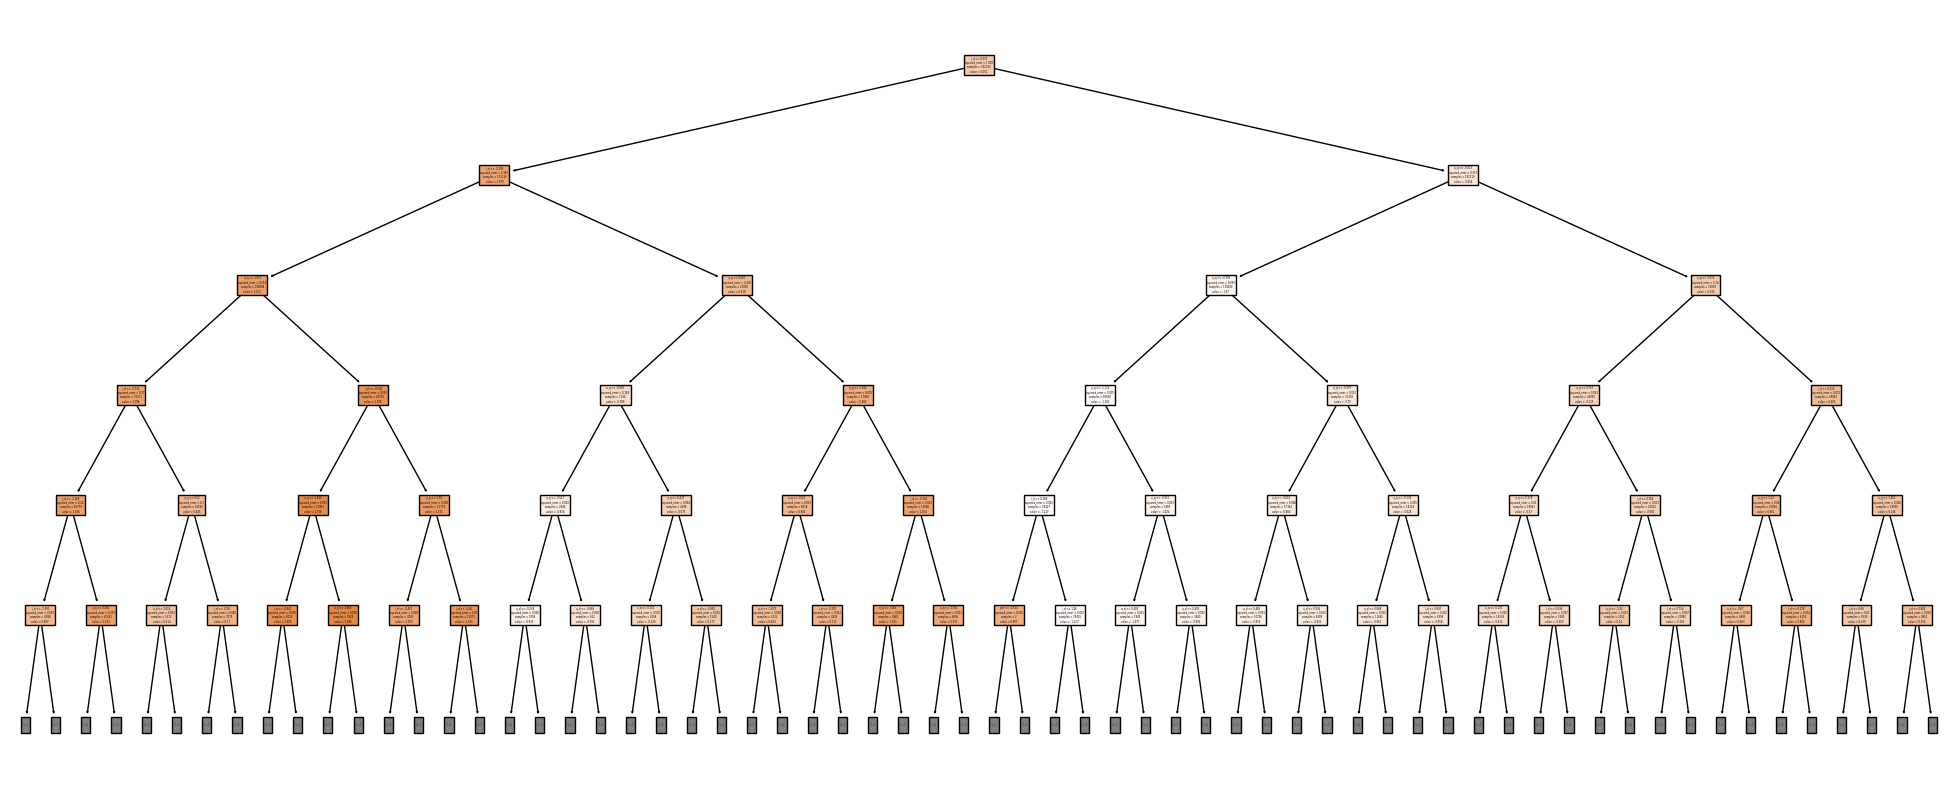

In [49]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(rnd_10.estimators_[9], feature_names= ['u_d', 'u_q', 'i_d', 'pm'],filled=True, max_depth=5)

Just like KNN a very high test accuracy of 0.99 and a very less error.

## Bagging
This is another ensemble technique in which we can define which estimator we want to use. Here the decision tree regressor is used.

In [50]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth = 30), n_estimators=10)
bag.fit(x_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=30))

In [51]:
y_pred_train = bag.predict(x_train)
y_pred_test = bag.predict(x_test)

bag_train_acc = r2_score(y_train, y_pred_train)
bag_test_acc = r2_score(y_test, y_pred_test)

bag_train_err = mean_squared_error(y_train, y_pred_train)
bag_test_err = mean_squared_error(y_test, y_pred_test)
print('Bagging ensemble train accuracy is', bag_train_acc)
print('Bagging ensemble test accuracy is', bag_test_acc)
print('----------------------------------------------------------------')
print('Bagging ensemble estimator train error is', bag_train_err)
print('Bagging ensemble estimator test error is', bag_test_err)

Bagging ensemble train accuracy is 0.9997779887425493
Bagging ensemble test accuracy is 0.9988933404098764
----------------------------------------------------------------
Bagging ensemble estimator train error is 0.0002428514329623499
Bagging ensemble estimator test error is 0.0012117004579574099


The results are almost same as the KNN and Random forest techniques.

## AdaBoost
This is another ensemble technique that assigns the weights to the parameters depending the errors. Higher weights are assigned to the incorrect predictions and lower weights are assigned to the correct predictions in each iteration. This will help it reach the convergence much faster.

In [52]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=30))
ada.fit(x_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=30))

In [53]:
y_pred_train = ada.predict(x_train)
y_pred_test = ada.predict(x_test)

ada_train_acc = r2_score(y_train, y_pred_train)
ada_test_acc = r2_score(y_test, y_pred_test)

ada_train_err = mean_squared_error(y_train, y_pred_train)
ada_test_err = mean_squared_error(y_test, y_pred_test)
print('AdaBoost ensemble train accuracy is', ada_train_acc)
print('AdaBoost ensemble test accuracy is', ada_test_acc)
print('----------------------------------------------------------------')
print('AdaBoost ensemble estimator train error is', ada_train_err)
print('AdaBoost ensemble estimator test error is', ada_test_err)

AdaBoost ensemble train accuracy is 0.9999999702083519
AdaBoost ensemble test accuracy is 0.9989617496281916
----------------------------------------------------------------
AdaBoost ensemble estimator train error is 3.258818725278883e-08
AdaBoost ensemble estimator test error is 0.001136798038188314


The accuracy is similar to the other ensemble techniques

## Gradient Boosting Regressor
This is an ensemble technique that uses the Gradient Descent algorithm in changing the weights.

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor(criterion='squared_error', learning_rate=1)
grad.fit(x_train, y_train)

GradientBoostingRegressor(criterion='squared_error', learning_rate=1)

In [55]:
y_pred_train = grad.predict(x_train)
y_pred_test = grad.predict(x_test)

grad_train_acc = r2_score(y_train, y_pred_train)
grad_test_acc = r2_score(y_test, y_pred_test)

grad_train_err = mean_squared_error(y_train, y_pred_train)
grad_test_err = mean_squared_error(y_test, y_pred_test)
print('Gradient Boosting ensemble train accuracy is', grad_train_acc)
print('Gradient Boosting ensemble test accuracy is', grad_test_acc)
print('----------------------------------------------------------------')
print('Gradient Boosting ensemble estimator train error is', grad_train_err)
print('Gradient Boosting ensemble estimator test error is', grad_test_err)

Gradient Boosting ensemble train accuracy is 0.9948184894756668
Gradient Boosting ensemble test accuracy is 0.9945318502090404
----------------------------------------------------------------
Gradient Boosting ensemble estimator train error is 0.005667898421877188
Gradient Boosting ensemble estimator test error is 0.005987170458754906


Almost equal accuracy as the random forest and bagging techniques.

## SVR
This model uses the support vector concept. Here the linear support vector regressor is used.

In [56]:
from sklearn.svm import LinearSVR
svr = LinearSVR(loss='epsilon_insensitive', epsilon=0.1)
svr.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(epsilon=0.1)

In [57]:
y_pred_train = svr.predict(x_train)
y_pred_test = svr.predict(x_test)

svr_train_acc = r2_score(y_train, y_pred_train)
svr_test_acc = r2_score(y_test, y_pred_test)

svr_train_err = mean_squared_error(y_train, y_pred_train)
svr_test_err = mean_squared_error(y_test, y_pred_test)
print('SVR train accuracy is', svr_train_acc)
print('SVR test accuracy is', svr_test_acc)
print('----------------------------------------------------------------')
print('SVR estimator train error is', svr_train_err)
print('SVR estimator test error is', svr_test_err)

SVR train accuracy is 0.9380586097196199
SVR test accuracy is 0.937922799557478
----------------------------------------------------------------
SVR estimator train error is 0.06775582266412954
SVR estimator test error is 0.06796938541554738


The accuracy dropped by some significant amount. This is not the proper model

## Stacking
In this technique different types of estimators or even ensembles can be used stacked upon each other to get the results.

Here the elastic net regressor, decision tree regressor, and the gradient boosting regressor are stacked together.

In [58]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import ElasticNet

estimators = [('els', ElasticNet()), ('dct', DecisionTreeRegressor(max_depth=30)), ('grad', GradientBoostingRegressor(criterion='squared_error', learning_rate=1))]
stack = StackingRegressor(estimators=estimators)
stack.fit(x_train, y_train)

StackingRegressor(estimators=[('els', ElasticNet()),
                              ('dct', DecisionTreeRegressor(max_depth=30)),
                              ('grad',
                               GradientBoostingRegressor(criterion='squared_error',
                                                         learning_rate=1))])

In [59]:
y_pred_train = stack.predict(x_train)
y_pred_test = stack.predict(x_test)

stack_train_acc = r2_score(y_train, y_pred_train)
stack_test_acc = r2_score(y_test, y_pred_test)

stack_train_err = mean_squared_error(y_train, y_pred_train)
stack_test_err = mean_squared_error(y_test, y_pred_test)
print('Stacking ensemble train accuracy is', stack_train_acc)
print('Stacking ensemble test accuracy is', stack_test_acc)
print('----------------------------------------------------------------')
print('Stacking ensemble estimator train error is', stack_train_err)
print('Stacking ensemble estimator test error is', stack_test_err)

Stacking ensemble train accuracy is 0.9997258123306433
Stacking ensemble test accuracy is 0.9981338815728518
----------------------------------------------------------------
Stacking ensemble estimator train error is 0.00029992563966566065
Stacking ensemble estimator test error is 0.002043244890261033


A very good accuracy is obtained here just like the other ensembles.

## Checking different regressors with cross validation
The cross validation technique is also applied with different estimators. Here the KFold cross validation technique is used and the r2 scores for each model is calculated.

### For decision tree regressor

In [60]:
# x = data[['u_d', 'u_q', 'i_d', 'pm']]
# y = data['motor_speed']
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

In [61]:
from sklearn.model_selection import cross_val_score, KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
dct2 = DecisionTreeRegressor(max_depth=30)
scores = cross_val_score(dct2, x, y, scoring='r2', cv=folds)
scores   

array([0.99801616, 0.99805661, 0.99803286, 0.9981637 , 0.99807979])

In [62]:
scores_dct = scores.mean()
scores_dct

0.9980698247427349

The accuracy is very close to that of the decision tree model above

### For random forest regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
rnd2 = RandomForestRegressor(n_estimators=10, max_depth=30)
from sklearn.model_selection import cross_val_score, KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(rnd2, x, y, scoring='r2', cv=folds)
print(scores)
scores_rnd = scores.mean()
scores_rnd

[0.99886703 0.99892514 0.99893829 0.99901216 0.99891876]


0.9989322747600993

The accuracy is very close to that of the random forest model above.

### For KNN regressor

In [64]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
from sklearn.model_selection import cross_val_score, KFold
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(knn, x, y, scoring='r2', cv=folds)
print(scores)
scores_knn = scores.mean()
scores_knn

[0.9985303  0.99855262 0.99859563 0.99867424 0.99862542]


0.9985956407735159

The accuracy is same as that of KNN regressor model above.

---------------

There is no difference in the accuracy scores of the base models and the cross validated models. The reason for this could be the very large size of the dataset. On datasets of this much size the improvement from the cross validation techniques is negligible or almost none.

## Aritifical Neural Networks
I also used the artifical neural networks. I worked on tuning the different hyperparameters and obtained the best set for this data that gives the highest accuracy.

In [65]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, r2_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 4,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(16,input_dim = 16,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(8,input_dim = 16,kernel_initializer = 'uniform',activation = 'elu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'linear'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'mean_squared_error',optimizer = 'adam',metrics = ['MeanSquaredError'])
    return model

# Create the model

ann = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 512,epochs = 20)

# Fitting the model

ann.fit(x_train,y_train)

# Predicting using trained model

y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

ann_train_acc = r2_score(y_train, y_pred_train)
ann_test_acc = r2_score(y_test, y_pred_test)

ann_train_err = mean_squared_error(y_train, y_pred_train)
ann_test_err = mean_squared_error(y_test, y_pred_test)
print('Neural network train accuracy is', ann_train_acc)
print('Neural network test accuracy is', ann_test_acc)
print('----------------------------------------------------------------')
print('Neural network train error is', ann_train_err)
print('Neural network test error is', ann_test_err)

C:\Users\harivars\AppData\Local\Temp\ipykernel_20888\246422929.py:27: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ann = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 512,epochs = 20)
D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Neural network train accuracy is 0.9961728760464944
Neural network test accuracy is 0.9961227563478406
----------------------------------------------------------------
Neural network train error is 0.004186375713131203
Neural network test error is 0.00424526019641644


The neural network with 3 hidden layers gave a very good accuracy same as the models above.

In [66]:
results = {
    'Model Name': ['Linear Model', 'Quadratic  Model', 'Cubic Model', 'Square root model', 'Cube root model','Decision Tree', 'KNN', 'Random Forest-10', 'Bagging', 'AdaBoost', 'Gradient Boost', 'SVR', 'Stacking', 'Neural Networks'],
    'Training Accuracy': [lin_acc, quad_acc, cube_acc, sqrt_acc, cbrt_acc, dct_train_acc, knn_train_acc, rnd10_train_acc, bag_train_acc, ada_train_acc, grad_train_acc, svr_train_acc, stack_train_acc, ann_train_acc],
    'Testing Accuracy': [lin_acc, quad_acc, cube_acc, sqrt_acc, cbrt_acc, dct_test_acc, knn_test_acc, rnd10_test_acc, bag_test_acc, ada_test_acc, grad_test_acc, svr_test_acc, stack_test_acc, ann_test_acc],
    'Training Error': [lin_err, quad_err, cube_err, sqrt_err, cbrt_err, dct_train_err, knn_train_err, rnd10_train_err, bag_train_err, ada_train_err, grad_train_err, svr_train_err, stack_train_err, ann_train_err],
    'Testing Error': [lin_err, quad_err, cube_err, sqrt_err, cbrt_err, dct_test_err, knn_test_err, rnd10_test_err, bag_test_err, ada_test_err, grad_test_err, svr_test_err, stack_test_err, ann_test_err]
}

results_df = pd.DataFrame(results)
results_df

,Model Name,Training Accuracy,Testing Accuracy,Training Error,Testing Error
0,Linear Model,0.939000,0.939000,6.640000e-02,0.066400
1,Quadratic Model,0.944000,0.944000,6.080000e-02,0.060800
2,Cubic Model,0.966000,0.966000,3.740000e-02,0.037400
3,Square root model,0.944000,0.944000,5.300000e-03,0.005300
4,Cube root model,0.955000,0.955000,4.300000e-03,0.004300
5,Decision Tree,0.999975,0.997895,2.738970e-05,0.002305
6,KNN,0.999003,0.998483,1.090322e-03,0.001661
7,Random Forest-10,0.999775,0.998902,2.464568e-04,0.001202
8,Bagging,0.999778,0.998893,2.428514e-04,0.001212
9,AdaBoost,1.000000,0.998962,3.258819e-08,0.001137


In [67]:
results_df.sort_values(by=['Testing Accuracy'], ascending=False)

,Model Name,Training Accuracy,Testing Accuracy,Training Error,Testing Error
9,AdaBoost,1.000000,0.998962,3.258819e-08,0.001137
7,Random Forest-10,0.999775,0.998902,2.464568e-04,0.001202
8,Bagging,0.999778,0.998893,2.428514e-04,0.001212
6,KNN,0.999003,0.998483,1.090322e-03,0.001661
12,Stacking,0.999726,0.998134,2.999256e-04,0.002043
5,Decision Tree,0.999975,0.997895,2.738970e-05,0.002305
13,Neural Networks,0.996173,0.996123,4.186376e-03,0.004245
10,Gradient Boost,0.994818,0.994532,5.667898e-03,0.005987
2,Cubic Model,0.966000,0.966000,3.740000e-02,0.037400
4,Cube root model,0.955000,0.955000,4.300000e-03,0.004300


In [68]:
results_df.sort_values(by=['Training Accuracy'], ascending=False)

,Model Name,Training Accuracy,Testing Accuracy,Training Error,Testing Error
9,AdaBoost,1.000000,0.998962,3.258819e-08,0.001137
5,Decision Tree,0.999975,0.997895,2.738970e-05,0.002305
8,Bagging,0.999778,0.998893,2.428514e-04,0.001212
7,Random Forest-10,0.999775,0.998902,2.464568e-04,0.001202
12,Stacking,0.999726,0.998134,2.999256e-04,0.002043
6,KNN,0.999003,0.998483,1.090322e-03,0.001661
13,Neural Networks,0.996173,0.996123,4.186376e-03,0.004245
10,Gradient Boost,0.994818,0.994532,5.667898e-03,0.005987
2,Cubic Model,0.966000,0.966000,3.740000e-02,0.037400
4,Cube root model,0.955000,0.955000,4.300000e-03,0.004300


-----------

### Conclusion
The **AdaBoost Regressor** model has the highest training accuracy and the highest testing accuracy. But we can see that all the non-equation based regression models except the Support Vector Regressor gave very high accuracies.